### Setup

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None, 'display.max_rows', 100) 

from os import path
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import missingno as msno
import pandas_profiling

import datetime
import dateutil

C:\Users\David\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Import

In [2]:
# Initial load with read_csv. Future imports should utilize pickle file created below.

d = '../data/raw'
f = 'loan.csv'

date_cols = [15, 26, 45, 47, 48]
col_type_dict = {'acc_now_delinq': 'float64',
                 'addr_state': 'O',
                 'all_util': 'float64',
                 'annual_inc': 'float64',
                 'annual_inc_joint': 'float64',
                 'application_type': 'O',
                 'collection_recovery_fee': 'float64',
                 'collections_12_mths_ex_med': 'float64',
                 'delinq_2yrs': 'float64',
                 'desc': 'O',
                 'dti': 'float64',
                 'dti_joint': 'float64',
                 'emp_length': 'O',
                 'emp_title': 'O',
                 'funded_amnt': 'float64',
                 'funded_amnt_inv': 'float64',
                 'grade': 'O',
                 'home_ownership': 'O',
                 'id': 'int64',
                 'il_util': 'float64',
                 'initial_list_status': 'O',
                 'inq_fi': 'float64',
                 'inq_last_12m': 'float64',
                 'inq_last_6mths': 'float64',
                 'installment': 'float64',
                 'int_rate': 'float64',
                 'last_pymnt_amnt': 'float64',
                 'loan_amnt': 'float64',
                 'loan_status': 'O',
                 'max_bal_bc': 'float64',
                 'member_id': 'int64',
                 'mths_since_last_delinq': 'float64',
                 'mths_since_last_major_derog': 'float64',
                 'mths_since_last_record': 'float64',
                 'mths_since_rcnt_il': 'float64',
                 'open_acc': 'float64',
                 'open_acc_6m': 'float64',
                 'open_il_12m': 'float64',
                 'open_il_24m': 'float64',
                 'open_il_6m': 'float64',
                 'open_rv_12m': 'float64',
                 'open_rv_24m': 'float64',
                 'out_prncp': 'float64',
                 'out_prncp_inv': 'float64',
                 'policy_code': 'float64',
                 'pub_rec': 'float64',
                 'purpose': 'O',
                 'pymnt_plan': 'O',
                 'recoveries': 'float64',
                 'revol_bal': 'float64',
                 'revol_util': 'float64',
                 'sub_grade': 'O',
                 'term': 'O',
                 'title': 'O',
                 'tot_coll_amt': 'float64',
                 'tot_cur_bal': 'float64',
                 'total_acc': 'float64',
                 'total_bal_il': 'float64',
                 'total_cu_tl': 'float64',
                 'total_pymnt': 'float64',
                 'total_pymnt_inv': 'float64',
                 'total_rec_int': 'float64',
                 'total_rec_late_fee': 'float64',
                 'total_rec_prncp': 'float64',
                 'total_rev_hi_lim': 'float64',
                 'url': 'O',
                 'verification_status': 'O',
                 'verification_status_joint': 'O',
                 'zip_code': 'O'}

data_raw = pd.read_csv(path.join(d,f), parse_dates=date_cols, dtype=col_type_dict)

In [18]:
# Create pickle file for raw data

f = 'loan.p'
d = '../data/raw'
fp = path.join(d,f)

with open(fp, 'wb') as file:
    pickle.dump(data_raw, file)

In [3]:
# Open pickle file with raw data

f = 'loan.p'
d = '../data/raw'
fp = path.join(d,f)

with open(fp, 'rb') as file:
    data = pickle.load(file)

In [4]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null datetime64[ns]
loan_status  

In [6]:
data.shape

(887379, 74)

In [7]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

In [8]:
data.describe(include=['O'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint
count,887379,887379,887379,835922,887379,887379,887379,887379,887379,887379,126029,887379,887228,887379,887379,887379,887379,511
unique,2,7,35,299272,12,6,3,10,2,887379,124470,14,63145,935,51,2,2,3
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified
freq,621125,254535,56323,13469,291569,443557,329558,601779,887369,1,246,524215,414001,9770,129517,456848,886868,283


In [9]:
data.describe(include=['datetime'])

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,887379,887350,869720,634408,887326
unique,103,697,98,100,103
top,2015-10-01 00:00:00,2001-08-01 00:00:00,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00
freq,48631,6659,470150,553406,730574
first,2007-06-01 00:00:00,1944-01-01 00:00:00,2007-12-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00
last,2015-12-01 00:00:00,2012-11-01 00:00:00,2016-01-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00


### Attribute Info

##### Borrower Info
- addr_state: The state provided by the borrower in the loan application (categorical: 2 char state code)
- annual_inc: The self-reported annual income provided by the borrower during registration (numeric)
- annual_inc_joint: The combined self-reported annual income provided by the co-borrowers during registration (numeric)
- emp_length: Employment length in years (categorical: '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years' , '9 years', '10+ years')
- emp_title: The job title supplied by the Borrower when applying for the loan (text)
- home_ownership: The home ownership status provided by the borrower during registration. (categorical: 'RENT', 'OWN', 'MORTGAGE', 'OTHER')
- verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified (categorical: 'Verified', 'Source Verified', 'Not Verified')
- member_id: A unique LC assigned Id for the borrower member (numeric)
- verification_status_joint: Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified (categorical: 'NaN', 'Verified', 'Source Verified', 'Not Verified')
- zip_code: The first 3 numbers of the zip code provided by the borrower in the loan application (categorical: '\[0-9\]\{3\}xx')

##### Loan Info
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers (categorical: 'INDIVIDUAL', 'JOINT')
- collection_recovery_fee: Post charge off collection fee (numeric)
- desc: Loan description provided by the borrower (text)
- grade: LC assigned loan grade (categorical: 'A',' B', 'C', 'D', 'E', 'F', 'G']
- id: A unique LC assigned ID for the loan listing (numeric)
- initial_list_status: The initial listing status of the loan (categorical: 'W', 'F')
- issue_d: The month which the loan was funded (date: Mon-Year)
- last_credit_pull_d: The most recent month LC pulled credit for this loan (date: Mon-Year)
- loan_status: Current status of the loan (categorical: 'Fully Paid', 'Charged Off', 'Current', 'Default', 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Issued')
- policy_code: publicly available policy_code=1; new products not publicly available policy_code=2 (categorical: '1', '2')
- purpose: A category provided by the borrower for the loan request (categorical: 'credit_card', 'car', 'small_business', 'other', 'wedding', 'debt_consolidation', 'home_improvement', 'major_purchase', 'medical', 'moving', 'vacation', 'house', 'renewable_energy', 'educational')
- sub_grade: LC assigned loan subgrade (categorical: '\[A-G\]\[1-5\]')
- title: The loan title provided by the borrower (text)
- url: URL for the LC page with listing data

##### Loan Finances
- funded_amnt: The total amount committed to that loan at that point in time (numeric)
- funded_amnt_inv: The total amount committed by investors for that loan at that point in time. (numeric)
- installment: The monthly payment owed by the borrower if the loan originates (numeric)
- int_rate:	Interest Rate on the loan (numeric)
- last_pymnt_amnt: Last total payment amount received (numeric)
- last_pymnt_d:	Last month payment was received (date: Mon-Year)
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value (numeric)
- next_pymnt_d:	Next scheduled payment date (date: Mon-Year)
- out_prncp: Remaining outstanding principal for total amount funded (numeric)
- out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors (numeric)
- pymnt_plan: Indicates if a payment plan has been put in place for the loan (categorical: 'y', 'n')
- recoveries: post charge-off gross recovery (numeric)
- term: The number of payments on the loan. Values are in months and can be either 36 or 60 (categorical: '36', '60')
- total_pymnt: Payments received to date for total amount funded (numeric)
- total_pymnt_inv: Payments received to date for portion of total amount funded by investors (numeric)
- total_rec_int: Interest received to date (numeric)
- total_rec_late_fee: Late fees received to date (numeric)
- total_rec_prncp: Principal received to date (numeric)

##### Borrower Credit History
- collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections (numeric)
- delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years (numeric)
- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage  and the requested LC loan, divided by the borrower’s self-reported monthly income. (numeric)
- dti_joint: A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income (numeric)
- earliest_cr_line:	The month the borrower's earliest reported credit line was opened (date: Mon-Year)
- fico_range_high: The upper boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- fico_range_low: The lower boundary range the borrower’s FICO at loan origination belongs to (MISSING)
- inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries) (numeric)
- last_fico_range_high	The upper boundary range the borrower’s last FICO pulled belongs to (MISSING)
- last_fico_range_low	The lower boundary range the borrower’s last FICO pulled belongs to (MISSING)
- mths_since_last_delinq: The number of months since the borrower's last delinquency (numeric)
- mths_since_last_major_derog: Months since most recent 90-day or worse rating (numeric)
- mths_since_last_record: The number of months since the last public record (numeric)
- open_acc:	The number of open credit lines in the borrower's credit file. (numeric)
- pub_rec: Number of derogatory public records (numeric)
- revol_bal: Total credit revolving balance (numeric)
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit (numeric)
- total_acc: The total number of credit lines currently in the borrower's credit file (numeric)
- open_acc_6m: Number of open trades in last 6 months (numeric)
- open_il_6m: Number of currently active installment trades (numeric)
- open_il_12m: Number of installment accounts opened in past 12 months (numeric)
- open_il_24m: Number of installment accounts opened in past 24 months (numeric)
- mths_since_rcnt_il: Months since most recent installment accounts opened (numeric)
- total_bal_il:	Total current balance of all installment accounts (numeric)
- il_util: Ratio of total current balance to high credit/credit limit on all install acct (numeric)
- open_rv_12m: Number of revolving trades opened in past 12 months (numeric)
- open_rv_24m: Number of revolving trades opened in past 24 months (numeric)
- max_bal_bc: Maximum current balance owed on all revolving accounts (numeric)
- all_util: Balance to credit limit on all trades (numeric)
- total_rev_hi_lim:	Total revolving high credit/credit limit (numeric)
- inq_fi: Number of personal finance inquiries (numeric)
- total_cu_tl: Number of finance trades (numeric)
- inq_last_12m:	Number of credit inquiries in past 12 months (numeric)
- acc_now_delinq: The number of accounts on which the borrower is now delinquent (numeric)
- tot_coll_amt: Total collection amounts ever owed (numeric)
- tot_cur_bal: Total current balance of all accounts (numeric)

In [22]:
num_cols = ['annual_inc', 'annual_inc_joint', 'loan_amnt', 'collection_recovery_fee', 'funded_amnt', 'funded_amnt_inv',
            'installment', 'int_rate', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_pymnt', 'total_pymnt_inv',
            'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'collections_12_mths_ex_med', 'delinq_2yrs', 'dti',
            'dti_joint', 'inq_last_6mths', 'inq_last_12m', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record',
            'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
            'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
            'inq_fi', 'total_cu_tl', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal']

cat_cols = ['emp_length', 'home_ownership', 'verification_status', 'verification_status_joint', 'zip_code',
            'application_type', 'grade', 'initial_list_status', 'loan_status', 'policy_code', 'purpose','sub_grade',
            'pymnt_plan', 'term', ]

date_cols = ['issue_d', 'last_credit_pull_d', 'last_pymnt_d', 'next_pymnt_d', 'earliest_cr_line']

id_cols = ['id', 'member_id']

text_cols = ['url', 'emp_title', 'desc', 'title']

### Data Cleaning

##### Default Loans

For the purpose of classifying which loans of defaulted, the loan_status column will need to be converted into a binary status column.

In [10]:
data['loan_status'].value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

A very small proprotion of loans marked simply Default. Descriptions provided by LC imply that loans marked as both Default and Charged Off can to be treated as default, since charged off loans are simply a more severe case of defaulting. Additionally, any loans with a status of "Does not meet the credit policy..." will be simplified the respective status.

In [11]:
data['default'] = data['loan_status'].str.contains('(?i)(?:Default|Charged Off)', regex=True).astype(int)

In [12]:
data['default'].value_counts()

0    840151
1     47228
Name: default, dtype: int64

During analysis it will be important to consider whether or not to discard records that have not reached completion, i.e. default/charged off or fully paid. Any other status (e.g. Late) still has the potential to become either default of fully paid, so categorizing them as either could be misleading. A harsh approach which errs on the side of caution would be to group all late payments as being in default:

In [13]:
data['default_harsh'] = data['loan_status'].str.contains('(?i)(?:Default|Charged Off|Late)', regex=True).astype(int)

In [15]:
data['default_harsh'].value_counts()

0    826203
1     61176
Name: default_harsh, dtype: int64

To avoid unnecessary complications in future analysis with the original loan status column, the two "Does not meet the credit policy..." values will be converted to their respective simpler version ("Fully Paid"/"Charged Off"):

In [220]:
import re

def fix_oop_loan_status(loan_status):

    s = re.search("(?:policy).*(?P<status>Fully Paid|Charged Off)", loan_status)
    if s:
        new_status = s['status']
    else:
        new_status = loan_status

    return new_status

In [226]:
data['loan_status'] = data['loan_status'].apply(fix_oop_loan_status)

In [227]:
data['loan_status'].value_counts()

Current               601777
Fully Paid            209685
Charged Off            46006
Late (31-120 days)     11591
Issued                  8460
In Grace Period         6253
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

##### Null Data (All)

An overview of all data, to start:

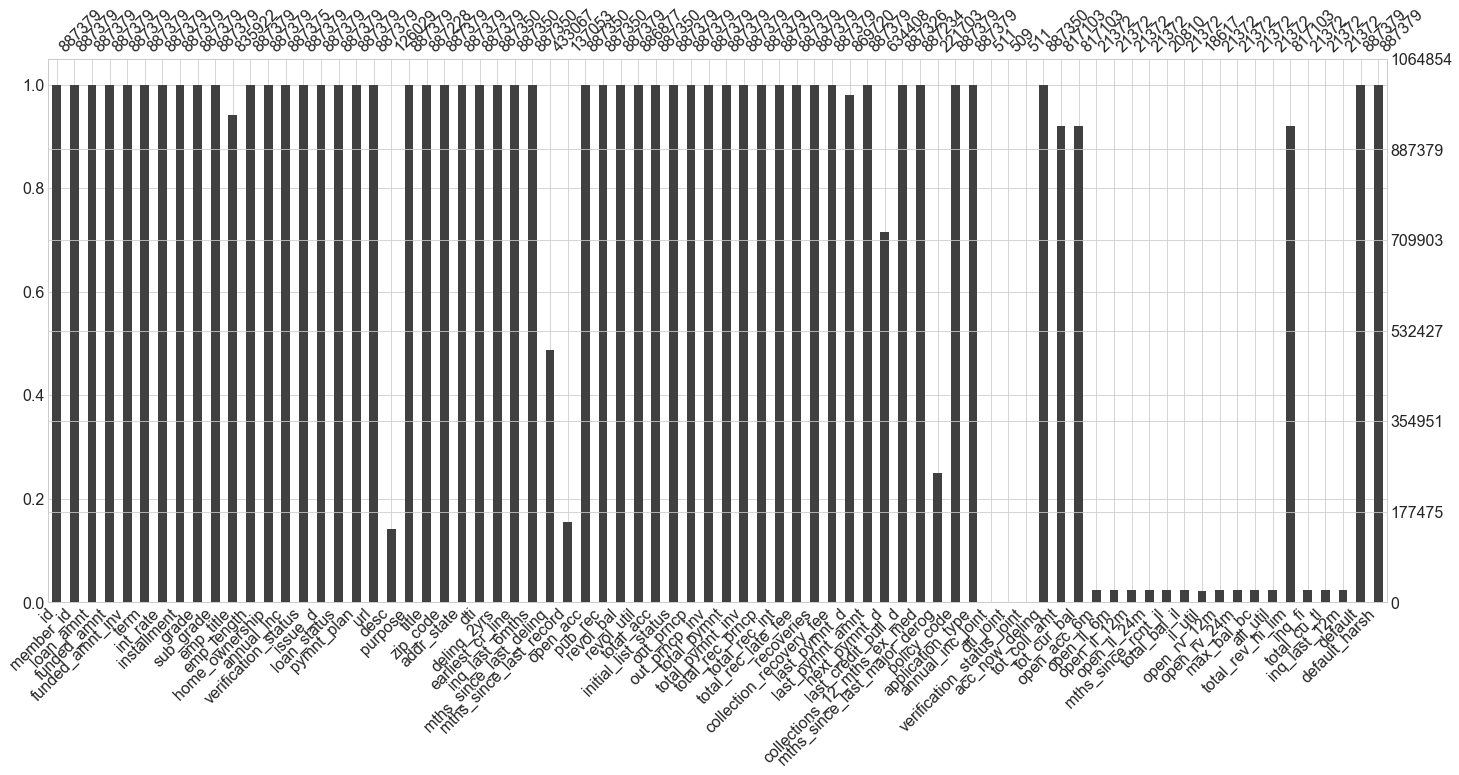

In [18]:
msno_bar_all = msno.bar(data, labels=True, inline=False)

for label in f.axes[0].get_xmajorticklabels() + f.axes[2].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
    
plt.show()

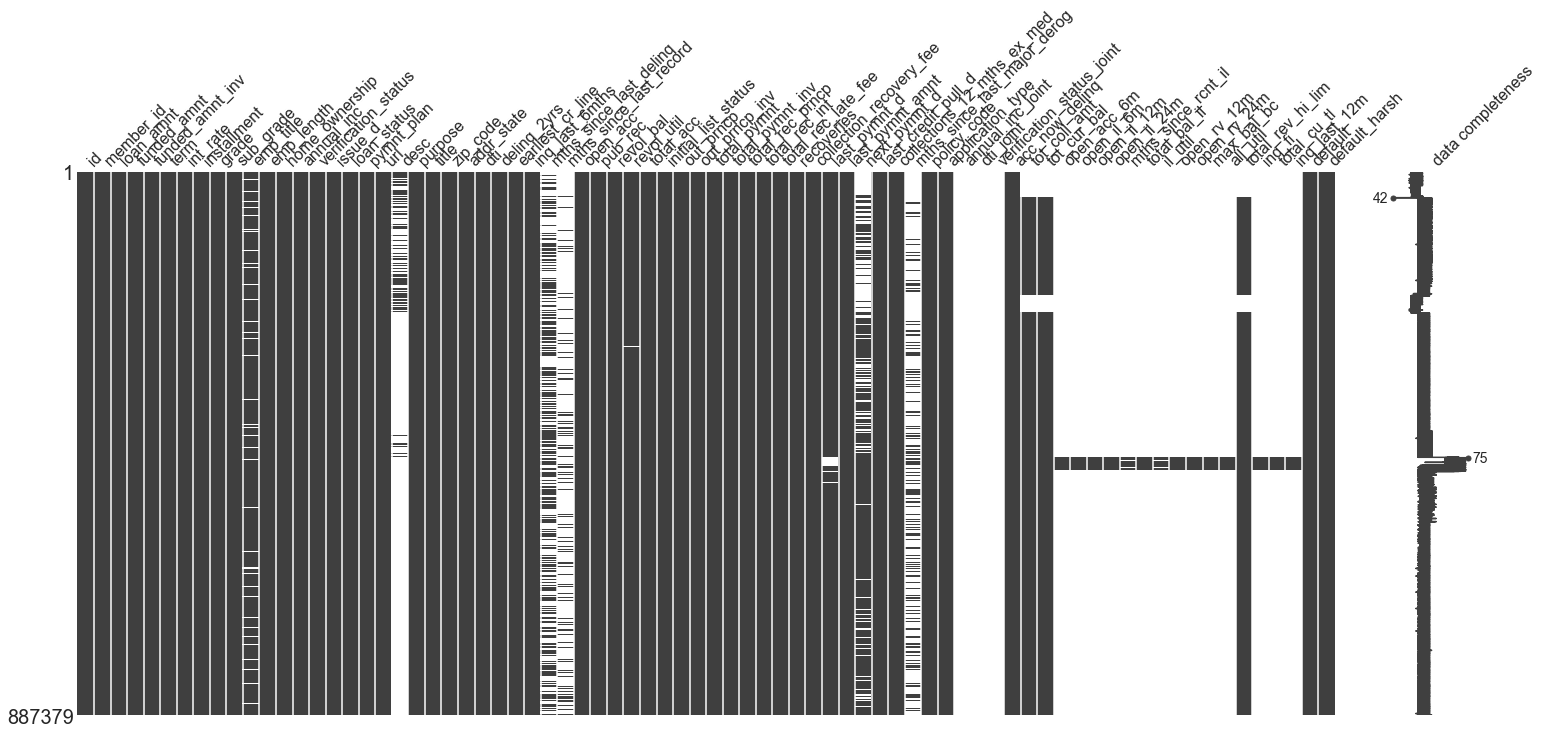

In [19]:
msno_mat_all = msno.matrix(data, labels=True, inline=False)

for label in f.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')

    plt.show()

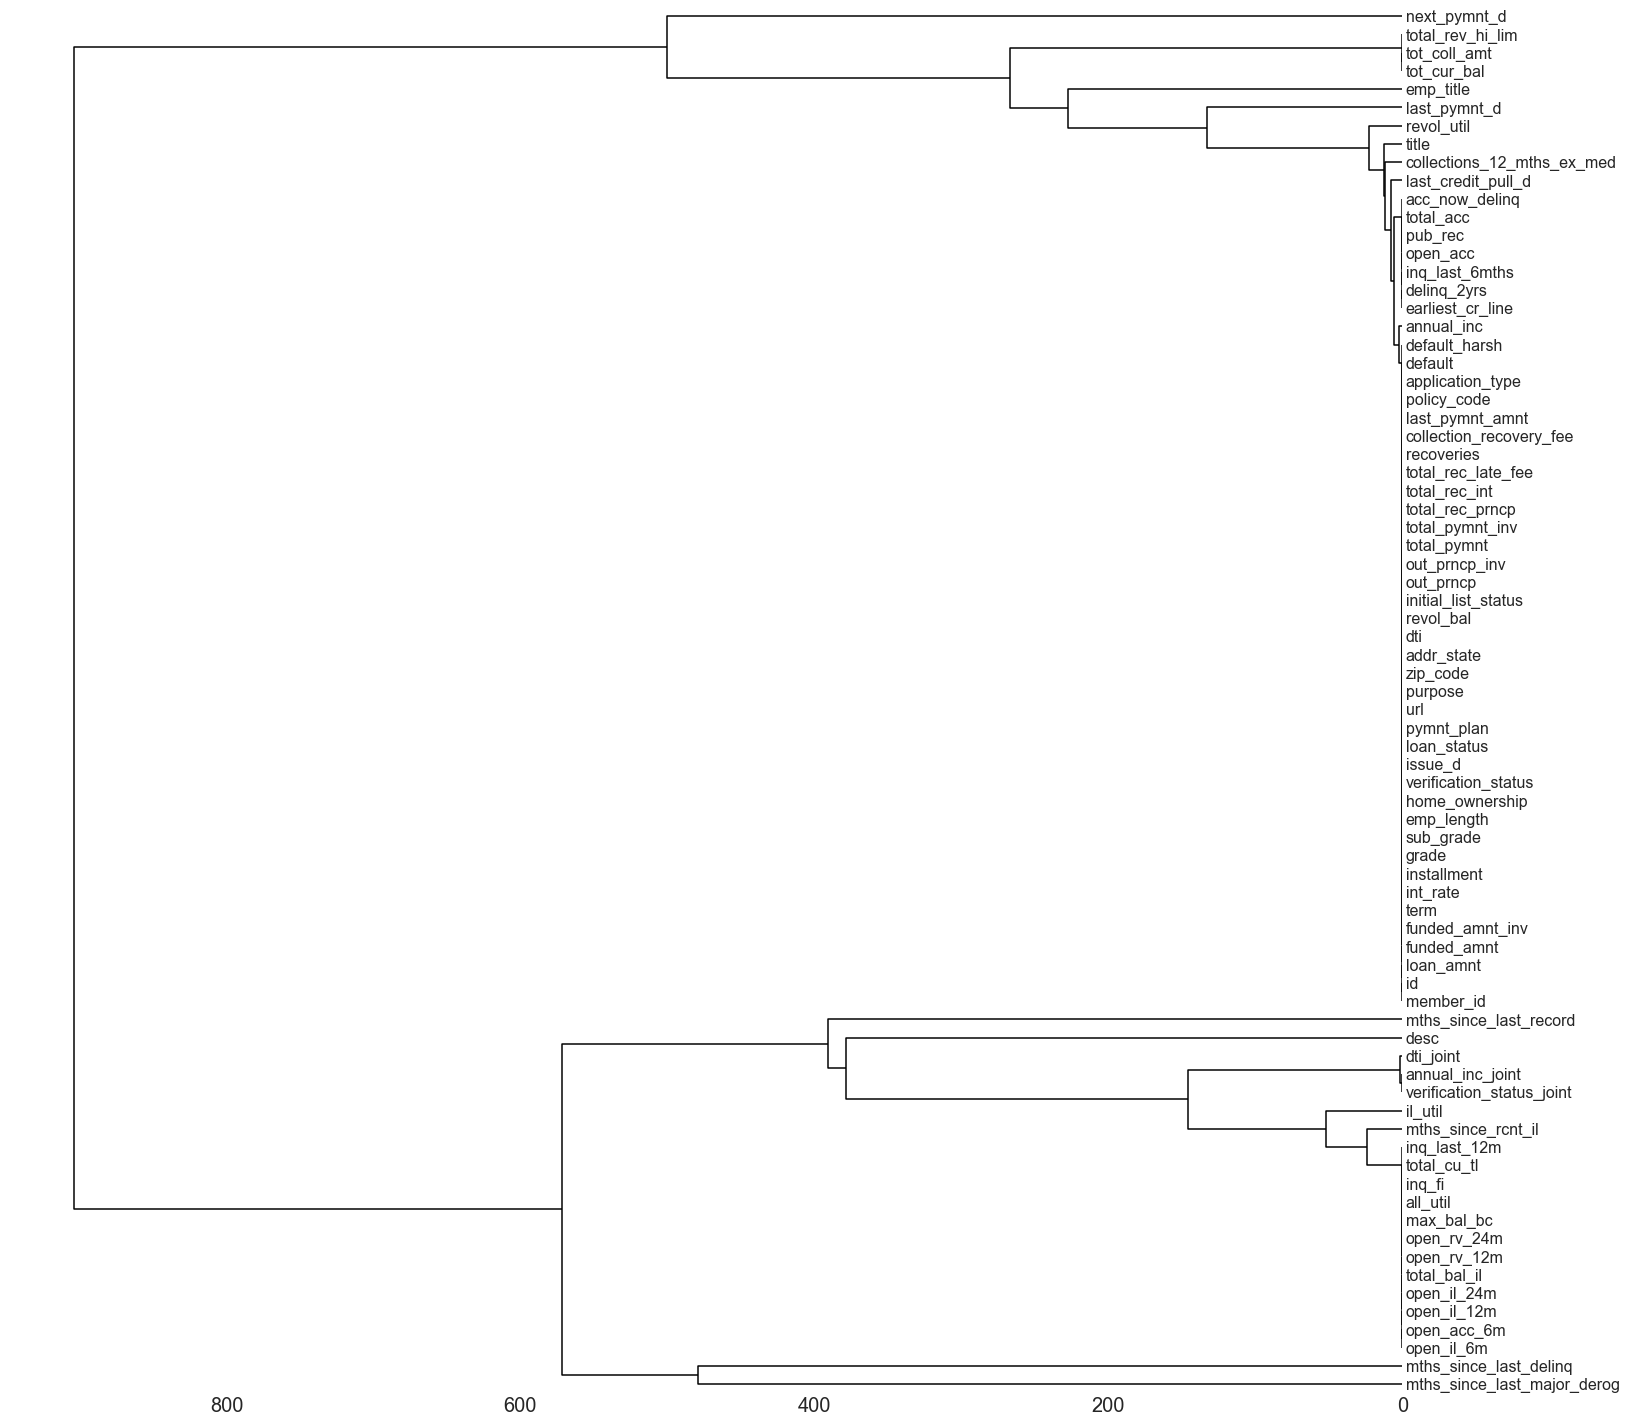

In [20]:
msno_dendro_all = msno.dendrogram(data, inline=False)
for label in f.axes[0].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')

plt.show()

There are already some clear features will signficiant amounts of missing data. Since this is a lot to process at once, we will split the handling of null values into numerical, categorical, and other.

##### Null Numerical Data

In [23]:
null_num_sum = data[num_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_num_sum, 'null':null_num_sum, '% null': null_num_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
annual_inc,887375,4,0.000005
annual_inc_joint,511,886868,0.999424
loan_amnt,887379,0,0.000000
collection_recovery_fee,887379,0,0.000000
funded_amnt,887379,0,0.000000
funded_amnt_inv,887379,0,0.000000
installment,887379,0,0.000000
int_rate,887379,0,0.000000
last_pymnt_amnt,887379,0,0.000000
out_prncp,887379,0,0.000000


Seems to be a recurring 29 missing values with the features 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 'total_acc', and 'acc_now_delinq'. Will see if dropping these fixes all instances:

In [25]:
data.dropna(subset=['open_acc'])[num_cols].isnull().sum()

annual_inc                          0
annual_inc_joint               886839
loan_amnt                           0
collection_recovery_fee             0
funded_amnt                         0
funded_amnt_inv                     0
installment                         0
int_rate                            0
last_pymnt_amnt                     0
out_prncp                           0
out_prncp_inv                       0
recoveries                          0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_int                       0
total_rec_late_fee                  0
total_rec_prncp                     0
collections_12_mths_ex_med        116
delinq_2yrs                         0
dti                                 0
dti_joint                      886841
inq_last_6mths                      0
inq_last_12m                   865978
mths_since_last_delinq         454283
mths_since_last_major_derog    665647
mths_since_last_record         750297
open_acc    

Appears to have eliminated all of the 29 NaN records, as well as the 4 missing annual income.

In [26]:
# Drop records missing open_acc (and those tied to it)
data.dropna(subset=['open_acc'], inplace=True)

Repeating the missigno visualizations for a more 'concise' represenation:

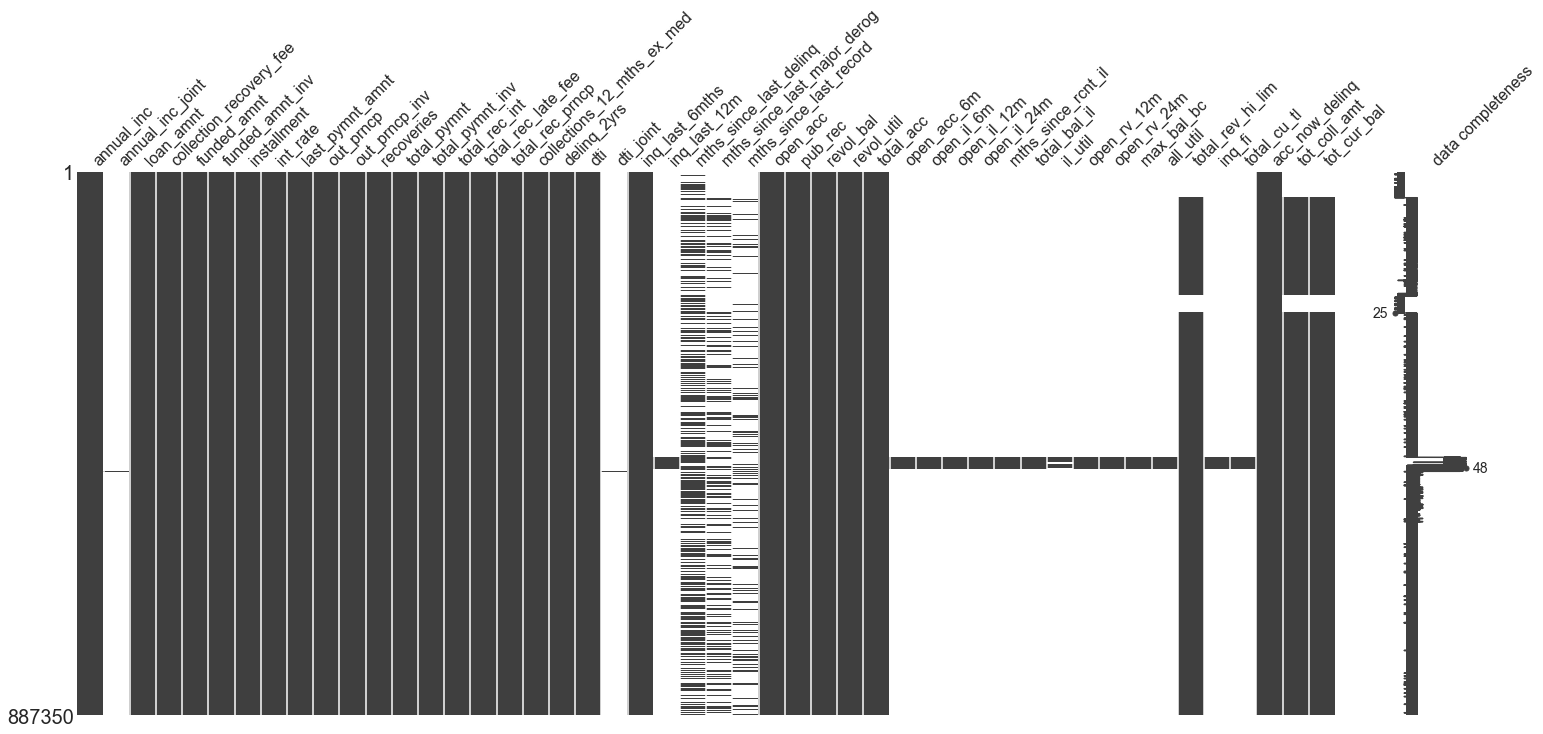

In [28]:
msno_mat_num = msno.matrix(data[num_cols], labels=True, inline=False)
for label in f.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
plt.show()

There is a clear gap in data for the set of 'x months ago' columns. Will check to see if the large areas of this missing time data are tied to older records, since one would expect only records within the past 6-24 months to have these columns filled:

In [29]:
# Check records with issue_d in 2015 (the last year in the dataset)
temp = data[(datetime.datetime(year=2015, month=1, day=1)) <= data['issue_d']]

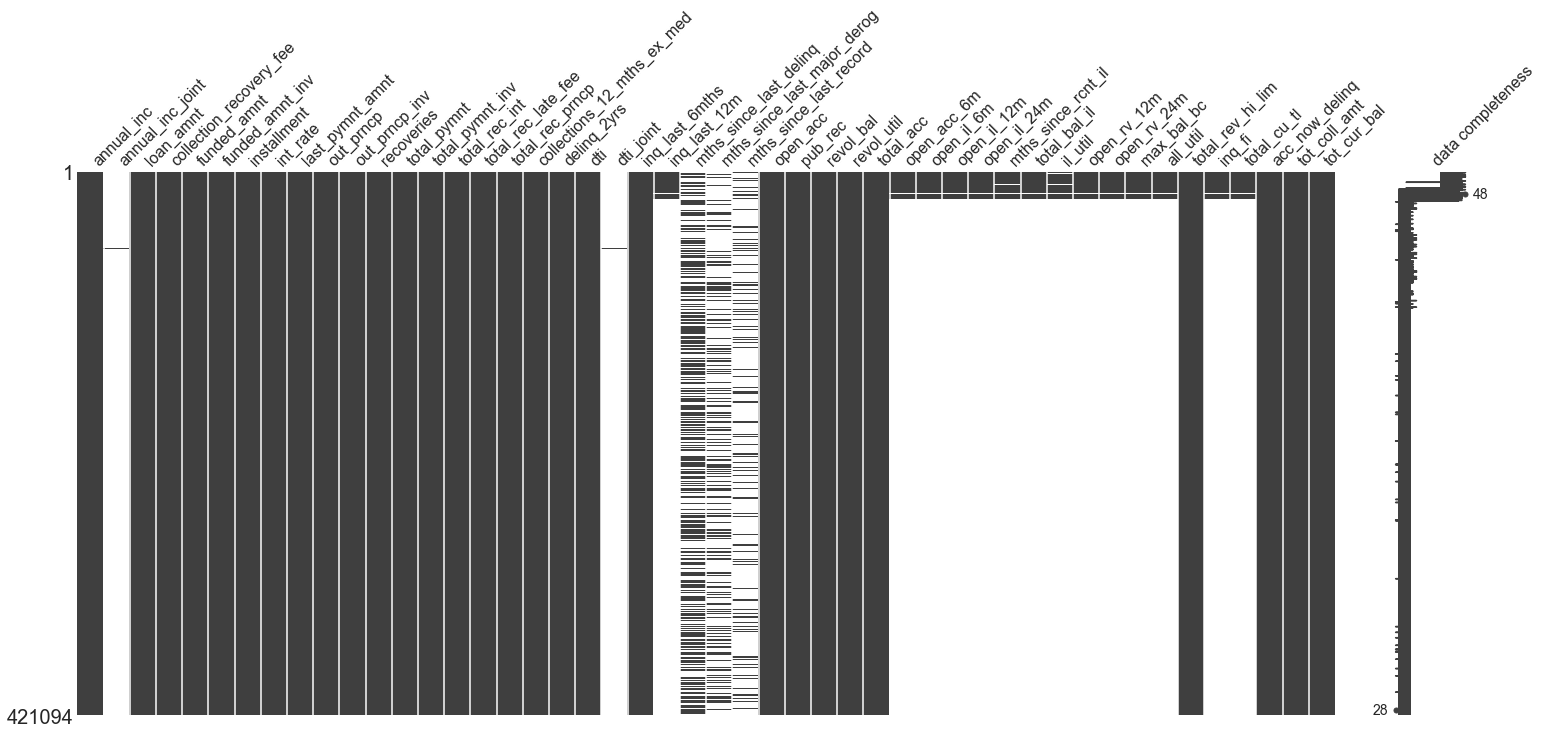

In [30]:
msno_mat_num_d = msno.matrix(temp[num_cols], labels=True, inline=False)
for label in f.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
plt.show()

Does not seem to make too much of an impact - the records with data are still only a fraction of the loans issued in 2015. Imputing is not feasible so we will need to remove those columns:

In [31]:
num_cols_remove = ['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                   'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

In [32]:
data.drop(num_cols_remove, axis=1, inplace=True)

'mnths_since_last_delinq', 'mths_since_last_major_derog', and 'mths_since_last_record' are also quite sparse, which is very likely a result of records which have no delinquency etc. on record.

In [34]:
# Percentage of NaN 'mths_since_last_delinq' explained by 0 delinquencies in past 2 years
((np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] == 0)).sum() / (np.isnan(data['mths_since_last_delinq'])).sum()

0.99537072705780316

99.5% of records missing 'mths_since_last_delinq' can be explained by the absence of delinquencies (at least in the past 2 years). As for the remaining 0.5%:

In [35]:
# A look at the records which are still missing the months even though there was a delinqueny in the past 2 yrs
data[(np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] > 0)][['mths_since_last_delinq', 'delinq_2yrs']].head()

,mths_since_last_delinq,delinq_2yrs
43607,NaN,1.0
44894,NaN,1.0
44932,NaN,3.0
45181,NaN,1.0
45305,NaN,1.0


In [36]:
# Count of records missing months since last delinquency even though there is a delinquency on record
((np.isnan(data['mths_since_last_delinq'])) & (data['delinq_2yrs'] > 0)).sum()

2103

In [37]:
# Check how many records are missing both 'mths_since_last_delinq' and 'delinq_2yrs'
((np.isnan(data['mths_since_last_delinq'])) & np.isnan(data['delinq_2yrs'])).sum()

0

Unfortunately there are 2,103 records with delinquencies in the past 2 years but still missing the months since last delinquency. However, if we simplify these months features to binary indicators of 'had delinquency' (etc.) based on the presence of values, we can fill the missing values. Delinquency has the advantage both the 'delinq_2yrs' and 'mths_since_last_delinq' being available for this purpose. However, 'mths_since_last_major_derog' and 'mths_since_last_record' will have to make do with their own values since there are no other columns available for additional information.

In [38]:
# Create new binary columns for history of delinquency etc.

data['had_delinq'] = data[['mths_since_last_delinq', 'delinq_2yrs']].apply(lambda x: 1 if x['mths_since_last_delinq'] > 0 or x['delinq_2yrs'] > 0 else 0, axis=1)

data['had_major_derog'] = data['mths_since_last_major_derog'].apply(lambda x: 1 if x > 0 else 0)

data['had_record'] = data['mths_since_last_record'].apply(lambda x: 1 if x > 0 else 0)

In [39]:
# Removing old columns
num_cols_remove = ['mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record']
data.drop(num_cols_remove, axis=1, inplace=True)

In [40]:
data[['had_delinq', 'had_major_derog', 'had_record']].isnull().sum()

had_delinq         0
had_major_derog    0
had_record         0
dtype: int64

Moving on, there are the two columns capturing joint borrower info ('annual_inc_joint', 'dti_joint'). It is evident that the missing data is simply for those records with an application type of 'INDIVIDUAL':

In [41]:
((data['application_type'] == 'INDIVIDUAL') & ~(np.isnan(data['annual_inc_joint']) | np.isnan(data['dti_joint']))).sum()

0

There are only a little over 500 records of type 'JOINT', so whilst the impact of removing these records should be minimial it is also fairly straightforward to create a form of merged annual_inc and dti column using the data from both columns for individual and joint (with joint taking priority):

In [42]:
data['annual_inc_merged'] = data.apply(lambda x: x['annual_inc'] if x['application_type'] == 'INDIVIDUAL' else x['annual_inc_joint'], axis=1)

In [43]:
data['dti_merged'] = data.apply(lambda x: x['dti'] if x['application_type'] == 'INDIVIDUAL' else x['dti_joint'], axis=1)

In [44]:
# Remove old joint columns
num_cols_remove = ['annual_inc_joint', 'dti_joint']
data.drop(num_cols_remove, axis=1, inplace=True)

In [45]:
data[data['dti_merged'].isnull() | data['annual_inc_merged'].isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default,default_harsh,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged
490007,66485064,71210901,15000.0,15000.0,14950.0,60 months,15.41,360.09,D,D1,fork lift driver,10+ years,RENT,44000.0,Verified,2015-12-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,973xx,OR,29.32,0.0,2003-05-01,0.0,8.0,0.0,17410.0,97.3,39.0,f,14832.53,14783.09,347.25,346.09,167.47,179.78,0.0,0.0,0.0,2016-01-01,360.09,2016-02-01,2016-01-01,0.0,1.0,JOINT,Not Verified,0.0,0.0,30286.0,17900.0,0,0,1,1,0,52640.0,NaN
529056,65098814,69635580,18000.0,18000.0,17750.0,36 months,10.99,589.22,B,B4,Automotive Armor Trim Tech,8 years,MORTGAGE,44720.0,Verified,2015-11-01,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,331xx,FL,26.57,0.0,2000-05-01,0.0,8.0,0.0,11522.0,64.0,13.0,f,17147.37,16909.22,1156.46,1140.40,852.63,303.83,0.0,0.0,0.0,2016-01-01,589.22,2016-02-01,2016-01-01,0.0,1.0,JOINT,Not Verified,0.0,0.0,32301.0,18000.0,0,0,1,1,0,109720.0,NaN


In [46]:
# Drop the 2 'JOINT' records missing data
data.dropna(subset=['dti_merged'], inplace=True)

As for the missing data in revol_util (approx. 500 records), it may be possible to get an estimate for the utilization based off the revolving balance and revolving limit (util = 100 * bal / lim):

In [47]:
# Ignore records that are missing values required for the calculation
revol_mask = ~np.isnan(data['total_rev_hi_lim']) & ~(np.isnan(data['revol_util']))

custom_rev_util_err = abs(100*(data[revol_mask]['revol_bal'] / data[revol_mask]['total_rev_hi_lim']) - data[revol_mask]['revol_util'])
custom_rev_util_err_p =  100*custom_rev_util_err.mean()/data[revol_mask]['revol_util'].mean() # rough approximation for mean percentage error to quickly circumvent issues with div by 0

print('Mean error for manually estimated revol_util = approx. {:.3f} ({:.2f}%)'.format(custom_rev_util_err.mean(), custom_rev_util_err_p))

Mean error for manually estimated revol_util = approx. 0.708 (1.28%)


Similarly, we can perform a similar analysis for the missing total_rev_hi_lim values (lim = bal / util):

In [48]:
# Ignore records that are missing values required for the calculation
revol_mask = ~np.isnan(data['revol_util']) & ~(np.isnan(data['total_rev_hi_lim'])) & (data['revol_bal'] > 0) & (data['revol_util'] > 0)

custom_rev_lim_err = abs((100*data[revol_mask]['revol_bal'] / data[revol_mask]['revol_util']) - data[revol_mask]['total_rev_hi_lim'])
custom_rev_lim_err_p =  100*custom_rev_lim_err.mean()/data[revol_mask]['total_rev_hi_lim'].mean() # rough approximation for mean percentage error to quickly circumvent issues with div by 0

print('Mean error for manually estimated total_rev_hi_lim = approx. {:.3f} ({:.2f}%)'.format(custom_rev_lim_err.mean(), custom_rev_lim_err_p))

Mean error for manually estimated total_rev_hi_lim = approx. 5910.253 (18.41%)


Whilst the estimate revol_util is fairly accurate, unfortunately the total_rev_hi_lim did not fare as well. For the sake of allowing for flexibility in future analysis, the estimations will be added as new columns versus filling missing values. This way, either records can be dropped which are missing revol_util and/or total_rev_hi_lim, or those columns can be dropped and the alternative estimate columns utilized in its place.

In [8]:
# Build functions to handle div by 0 cases

def get_rev_util(row):
    if not np.isnan(row['revol_util']):
        # Preserve existing data
        val = row['revol_util']
    elif row['revol_bal'] == 0 and row['total_rev_hi_lim'] == 0:
        # If everything is 0, so is util
        val = 0
    elif row['total_rev_hi_lim'] != 0 and not np.isnan(row['total_rev_hi_lim']):
        # Estimate
        val = 100*row['revol_bal'] / row['total_rev_hi_lim']
    else:
        # If limit = 0 but there is a balance, assume util = 100%
        val = 100
    
    return val

def get_rev_lim(row):
    if not np.isnan(row['total_rev_hi_lim']):
        # Preserve existing data
        val = row['total_rev_hi_lim']
    elif row['revol_bal'] == 0 and row['revol_util'] == 0:
        # If everything is 0, so is lim
        val = 0
    elif row['revol_util'] != 0 and not np.isnan(row['revol_util']):
        # Estimate
        val = 100*row['revol_bal'] / row['revol_util']
    else:
        # If util = 0 but there is a balance, set to NaN
        val = row['revol_bal']

    return val

In [9]:
rev_cols = ['revol_util', 'revol_bal', 'total_rev_hi_lim']

data['rev_util_custom'] = data[rev_cols].apply(get_rev_util, axis=1)

data['rev_lim_custom'] = data[rev_cols].apply(get_rev_lim, axis=1)

In [10]:
data['rev_util_custom'].isnull().sum()

0

In [11]:
data['rev_lim_custom'].isnull().sum()

0

It is is important to note that with the sequence of calculations above, in the cases where there were both null utilization and limit, everything is bumped up to an assumed 100% util, with limit = balance.

The two most significant missing values which remain are 'tot_coll_amt' and 'tot_cur_bal'. We will look into the possibilities of imputing or calculating these values from other data:

In [63]:
data[['tot_coll_amt', 'tot_cur_bal']].describe().astype('str')

,tot_coll_amt,tot_cur_bal
count,817101.0,817101.0
mean,225.703162767,139458.454088
std,10311.3798089,153750.061914
min,0.0,0.0
25%,0.0,29853.0
50%,0.0,80559.0
75%,0.0,208205.0
max,9152545.0,8000078.0


In [64]:
# List of columns capturing financial info/amounts
fin_cols = ['annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'dti', 'revol_bal', 'revol_util',
              'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
              'recoveries', 'collection_recovery_fee', 'tot_coll_amt', 'tot_cur_bal', 'loan_status']

In [66]:
# Check correlation of financial columns wit tot_coll_amt and tot_cur_bal
data[fin_cols].corr()[['tot_coll_amt', 'tot_cur_bal']]

,tot_coll_amt,tot_cur_bal
annual_inc,0.001096,0.418332
loan_amnt,-0.004275,0.328783
funded_amnt,-0.004275,0.328782
funded_amnt_inv,-0.004274,0.328805
dti,-0.002084,-0.007281
revol_bal,-0.006220,0.442036
revol_util,-0.009513,0.080796
out_prncp,-0.000835,0.209130
out_prncp_inv,-0.000835,0.209160
total_pymnt,-0.004266,0.167519


For tot_coll_amt, it would appear the majority of records have a value of 0. Whilst there does not appear to be any notable correlation with the other financial quantities, perhaps there is connection to the loan status:

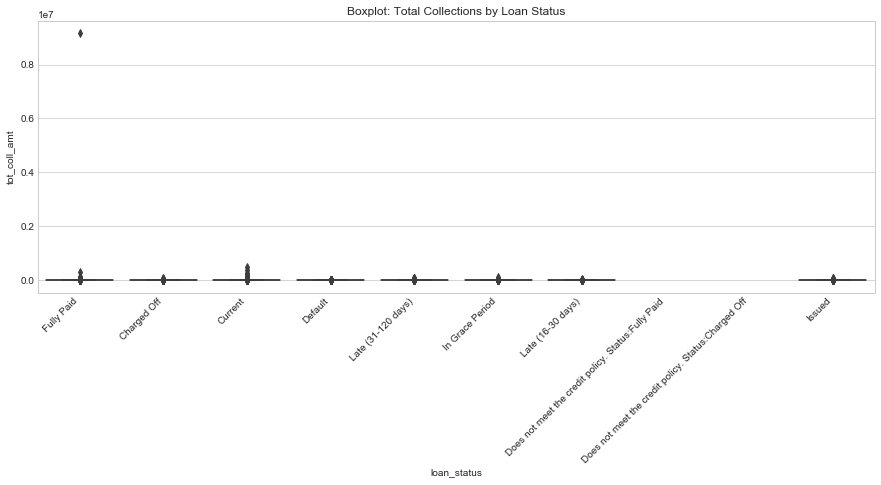

In [67]:
plt.figure(figsize=(15,5))

ax = sns.boxplot(data['loan_status'],data['tot_coll_amt'], showfliers=True)

for label in ax.get_xmajorticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('right')

plt.title('Boxplot: Total Collections by Loan Status')
    
plt.show()

In [68]:
# Check distribution of null values by loan status
data[data['tot_coll_amt'].isnull()].groupby('loan_status')['tot_coll_amt'].size()

loan_status
Charged Off                                            10019
Current                                                 3587
Default                                                   18
Does not meet the credit policy. Status:Charged Off      758
Does not meet the credit policy. Status:Fully Paid      1962
Fully Paid                                             53689
In Grace Period                                           66
Late (16-30 days)                                         27
Late (31-120 days)                                       121
Name: tot_coll_amt, dtype: int64

In [69]:
# Ignoring null values, calculate percentage of tot_coll_amt = 0
(data['tot_coll_amt'] == 0).sum() / (~np.isnan(data['tot_coll_amt'])).sum()

0.8578425433330763

In [70]:
# Check distribution of tot_col_amt = 0 by loan status
data[data['tot_coll_amt'] == 0].groupby('loan_status')['tot_coll_amt'].size()

loan_status
Charged Off            31030
Current               508471
Default                 1031
Fully Paid            136528
In Grace Period         5227
Issued                  7045
Late (16-30 days)       1947
Late (31-120 days)      9665
Name: tot_coll_amt, dtype: int64

There does not appear to be much distinction between the number of missing values and the loan status. However, considering the proportion of records with null values and tot_col_amt = 0, filling missing values with 0 would not be the worst method of imputation given approx. 85% of records are zero. Alternatively, this column could be dropped entirely during analysis, so a new column will be created for zero-filled option enabling a choice between one or the other.

In [173]:
# Create new column with NaN values replaced with 0
data['tot_coll_amt_filled'] = data['tot_coll_amt'].fillna(0)

As for tot_cur_bal, we can see that there a number of financial values with which it has a somewhat signficant correlation. Taking annual income and splitting it into quantile bins, we can observe how the total balance slowly increasing with increasing income:

In [71]:
def get_qbin(val, quartiles):
    '''
    Return which of the provided quartiles the value falls in.
    '''
    for i, q in enumerate(quartiles):
        if val <= q:
            return i+1

In [72]:
q = 0.05
q_range = np.arange(q, 1+q, q)
quantiles = data['annual_inc'].quantile(q_range)

In [73]:
income_q = data['annual_inc'].apply(lambda x: get_qbin(x, quantiles))

In [84]:
plt.figure(figsize=(15,5))

ax = sns.boxplot(income_q, data['tot_cur_bal'], showfliers=False)

plt.title('Boxplot: Total Current Balance per Annual Income Quantile (5% intervals)')

plt.xticks(np.arange(0,20,1), q_range)
plt.xlabel('annual_inc quantile')

f = 'Boxplot_TotCurBal_v_AnnualIncQuantiles.png'
d = ['..', 'reports', 'figures']
plt.savefig(path.join(*d, f))

![](../reports/figures/Boxplot_TotCurBal_v_AnnualIncQuantiles.png)

Consequently, one option for filling missing tot_cur_bal is to use the median value for the given income bin. We will create two new columns to capture this, one which fills the missing value with the median, and one which replaces all values with the median:

In [86]:
# Get mean balance for each income quantile
med_inc_bal = data.groupby(income_q)['tot_cur_bal'].median()

# Add temp column to dataframe for income quantile
data['income_q'] = income_q

# Fill NaN values with quantile median tot_cur_bal
data['tot_cur_bal_filled'] = data[['tot_cur_bal', 'income_q']].apply(lambda x: x['tot_cur_bal'] if not np.isnan(x['tot_cur_bal']) else med_inc_bal[x['income_q']], axis=1)

# Replace all values with quantile median tot_cur_bal
data['tot_cur_bal_med'] = data['income_q'].apply(lambda x: med_inc_bal[x])

# Drop temporary income_q column
data.drop('income_q', axis=1, inplace=True)

In [87]:
data[['tot_cur_bal','tot_cur_bal_filled', 'tot_cur_bal_med']].head()

,tot_cur_bal,tot_cur_bal_filled,tot_cur_bal_med
0,NaN,15008.0,15008.0
1,NaN,24713.0,24713.0
2,NaN,15008.0,15008.0
3,NaN,49042.0,49042.0
4,NaN,139355.5,139355.5


In [88]:
data[~np.isnan(data['tot_cur_bal'])][['tot_cur_bal','tot_cur_bal_filled', 'tot_cur_bal_med']].head()

,tot_cur_bal,tot_cur_bal_filled,tot_cur_bal_med
42535,114834.0,114834.0,64076.5
42536,14123.0,14123.0,15008.0
42537,267646.0,267646.0,193916.0
42538,13605.0,13605.0,36235.5
42539,272492.0,272492.0,89597.5


We will keep the original column in the case where we may want to discard the approx. 70k NaN records and just use the complete data.

The final numerical column with missing data is collections_12_mths_ex_med:

In [95]:
# Percentage of records with collections_12_mths_ex_med
100 * data['collections_12_mths_ex_med'].isnull().sum() / data.shape[0]

0.01307266145863855

Only 1.3% of records actually have values, and given the nature of this feature it would be reasonable to assume that the absence of a value indicates that there is no collection on record for the past 12 months. Thus, for consistency we will perform the same conversion to a binary representation (as done with delinquency, etc.):

In [96]:
data['had_collections'] = data['collections_12_mths_ex_med'].apply(lambda x: 1 if x > 0 else 0)

In [97]:
# Drop old column
data.drop('collections_12_mths_ex_med', axis=1, inplace=True)

##### Null Categorical Data

Taking a look at the categorical data, we can see that the verification status for joint borrowers is the only field with missing data:

In [100]:
null_cat_sum = data[cat_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_cat_sum, 'null':null_cat_sum, '% null': null_cat_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
emp_length,887348,0,0.000000
home_ownership,887348,0,0.000000
verification_status,887348,0,0.000000
verification_status_joint,509,886839,0.999426
zip_code,887348,0,0.000000
application_type,887348,0,0.000000
grade,887348,0,0.000000
initial_list_status,887348,0,0.000000
loan_status,887348,0,0.000000
policy_code,887348,0,0.000000


This ties back to the same issue with only records of application type 'JOINT' having this field populated:

In [103]:
# Nymber of null verification_status_joint records of type 'JOINT'
(data['verification_status_joint'].isnull() & (data['application_type'] == 'JOINT')).sum()

0

To fix this we can simply take the same approach of creating a new merged column which combines both the individual and joint values, with the joint value taking priority:

In [118]:
data['verification_status_merged'] = data[['verification_status', 'verification_status_joint']].apply(
                                            lambda x: x['verification_status'] if pd.isnull(x['verification_status_joint'])
                                            else x['verification_status_joint'],
                                            axis=1)

In [119]:
data['verification_status_merged'].isnull().sum()

0

In [122]:
# Drop old verificatin status column
data.drop('verification_status_joint', axis=1, inplace=True)

##### Null Date Data

In [123]:
null_date_sum = data[date_cols].isnull().sum()
pd.DataFrame({'not null': data.shape[0] - null_date_sum, 'null':null_date_sum, '% null': null_date_sum/data.shape[0]})[['not null', 'null', '% null']]

,not null,null,% null
issue_d,887348,0,0.000000
last_credit_pull_d,887296,52,0.000059
last_pymnt_d,869689,17659,0.019901
next_pymnt_d,634377,252971,0.285087
earliest_cr_line,887348,0,0.000000


The columns for last and next payment date are only meaningul for loans that are still in effect. Consequently, it is best to simply remove these columns since they do not provide a fair means of comparison or any useful insight between active loans and those that have been resolved in years past.

In [124]:
data.drop(['last_pymnt_d', 'next_pymnt_d'], axis=1, inplace=True)

As for last_credit_pull_d, we will see if there is any obvious correlation to the other date fields:

In [133]:
data[(~pd.isnull(data['last_credit_pull_d']))][['earliest_cr_line', 'issue_d', 'last_credit_pull_d']]

,earliest_cr_line,issue_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2016-01-01
1,1999-04-01,2011-12-01,2013-09-01
2,2001-11-01,2011-12-01,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01
5,2004-11-01,2011-12-01,2015-09-01
6,2005-07-01,2011-12-01,2016-01-01
7,2007-01-01,2011-12-01,2014-12-01
8,2004-04-01,2011-12-01,2012-08-01
9,2004-09-01,2011-12-01,2013-03-01


In [135]:
(data['last_credit_pull_d'] > data['issue_d']).sum() / data.shape[0]

0.99662590099938242

It would appear that almost all records have a last credit pull date after the issue_d, however we will need to check how much varation there is between the two if we are going to use this for filling values:

In [157]:
date_diff = [(b.date() - a.date()).days for a, b in zip(data.dropna()['issue_d'], data.dropna()['last_credit_pull_d'])]

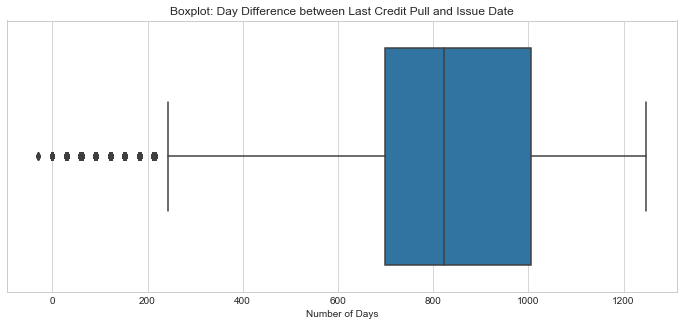

In [159]:
plt.figure(figsize=(12,5))

sns.boxplot(date_diff)

plt.title('Boxplot: Day Difference between Last Credit Pull and Issue Date')
plt.xlabel('Number of Days')

plt.show()

With a median difference of 800 days, it is evident that we are encountering the same issue anticipated with previous/next payment dates; older loans on file are still updated with more recent credit pull dates and consequently don't accurately reflect the situation at the time of the loan itself. Consequently it would be best to discard this column for analysis.

In [160]:
data.drop('last_credit_pull_d', axis=1, inplace=True)

The two remaining dates, 'earliest_cr_line' and 'issue_d' are absolute, i.e. they never get updated during the course of the loan and consequently can still act as a valid snapshot of conditions during the loan. It is worth noting that 'earliest_cr_line', if used for analysis, should likely be adjusted for its relative time difference from the issue date, since this will give a more accurate picture of the loans/borrowers situation at the time the loan was requested.

In [161]:
data['earliest_cr_line_td'] = [(cr.date() - issue_d.date()).days for issue_d, cr in zip(data['issue_d'], data['earliest_cr_line'])]

In [162]:
data['earliest_cr_line_td'].isnull().sum()

0

##### Text Data

In [170]:
data[text_cols].isnull().sum()

url               0
emp_title     51445
desc         761347
title           151
dtype: int64

The text data identified, such as the description of their employment, loan purpose, etc. is going to be limited since these fields were all entered by the applicants without any strict categories or tags. For example, taking a look at the 'title' of loans:

In [167]:
data['title'].value_counts()

Debt consolidation                          413999
Credit card refinancing                     164330
Home improvement                             40111
Other                                        31892
Debt Consolidation                           15760
Major purchase                               12051
Business                                      6728
Medical expenses                              6674
Car financing                                 5565
Consolidation                                 5381
debt consolidation                            4834
Moving and relocation                         3921
Vacation                                      3805
Debt Consolidation Loan                       3804
Home buying                                   2365
Credit Card Consolidation                     2359
consolidation                                 2174
Personal Loan                                 2133
Consolidation Loan                            1778
Home Improvement               

This information is captured much more concisely in the 'purpose' column:

In [168]:
data['purpose'].value_counts()

debt_consolidation    524212
credit_card           206182
home_improvement       51829
other                  42866
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

The same issue can be seen for 'emp_title':

In [172]:
data['emp_title'].value_counts()

Teacher                                   13469
Manager                                   11240
Registered Nurse                           5525
Owner                                      5376
RN                                         5355
Supervisor                                 4983
Sales                                      4212
Project Manager                            3988
Driver                                     3569
Office Manager                             3510
General Manager                            3178
Director                                   3156
manager                                    3138
teacher                                    2925
owner                                      2849
Engineer                                   2671
President                                  2598
driver                                     2429
Vice President                             2351
Attorney                                   2136
Operations Manager                      

The variation / inconsistency in data is obviously even worse for description, and so for the sake of simplicity and the effort it would take to identify and split these text values into appropriate categories, we will simply remove these columns from the data:

In [169]:
text_cols

['url', 'emp_title', 'desc', 'title']

In [173]:
data.drop(text_cols, axis=1, inplace=True)

Whilst it is a shame to lose all information regarding the employment title, one would hope that at least the annual income provides equavelent insight.

##### Final Review of Null Data

In [174]:
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
purpose                           0
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                  

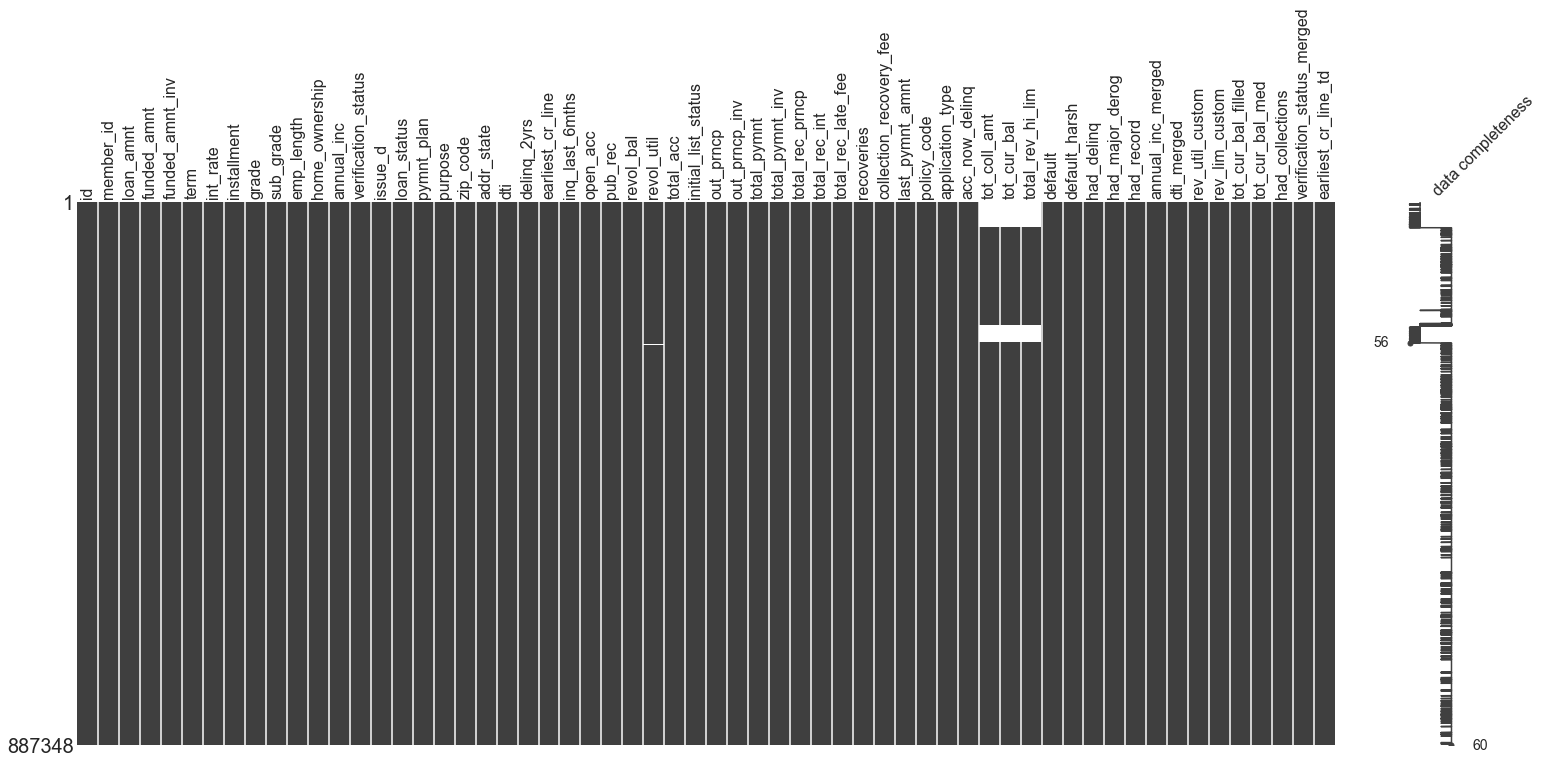

In [178]:
msno_mat_cleaned = msno.matrix(data, labels=True, inline=False)
for label in msno_mat_cleaned.axes[1].get_xmajorticklabels():
    label.set_rotation(90)
    label.set_horizontalalignment('center')
plt.show()

The data set is clearly looking a lot more complete, with the only remaining issues being the columns already identified earlier.


The columns remaining null columns of revol_util, tot_coll_amt, tot_cur_bal, total_rev_hi_lim all have their equivalent filled/calculated columns. During analysis, based off whichever columns prove to be the most useful, the new columns can be used instead, or the NaN rows can be dropped from dataset.

### ID Columns

We have not addressed the ID columns yet. For the purpose of actually modelling itself these are obviously useless, but it may be worth preserving at least the loan ID for consistency in potential joins between different encodings tables.

In [12]:
# Check if all records have a unique ID
data['id'].duplicated().sum()

0

In [13]:
# Set id column as the new index
data.set_index('id', drop=True, inplace=True)

In [16]:
# Drop member_id column
data.drop('member_id', axis=1, inplace=True)

In [17]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default,default_harsh,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged,rev_util_custom,rev_lim_custom,tot_cur_bal_filled,tot_cur_bal_med,had_collections,verification_status_merged,earliest_cr_line_td
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,0,0,24000.0,27.65,16305.854241,16305.854241,15008.0,15008.0,0,Verified,-9830
1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,1,0,0,0,30000.0,1.00,17946.808511,17946.808511,24713.0,24713.0,0,Source Verified,-4627
1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,0,0,12252.0,8.72,3001.015228,3001.015228,15008.0,15008.0,0,Not Verified,-3682
1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,1,0,0,49200.0,20.00,26657.142857,26657.142857,49042.0,49042.0,0,Source Verified,-5782
1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,972xx,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,1,0,0,80000.0,17.94,51545.454545,51545.454545,139355.5,139355.5,0,Source Verified,-5813


### Removing Current Loans

Current loans should be discarded from anaylsis since there is no way of categorizing them as defaulted or fully paid. Additionally, for the purposes of regression they will be misleading since many current loans will appear to be at a loss even if they are on track to being fully paid.

In [23]:
# Retain copy of current loan data

mask = data['loan_status'].isin(['Current', 'Issued', 'In Grace Period'])

data_current = data[mask].copy()

f = 'loan_current.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'wb') as file:
    pickle.dump(data_current, file)

In [28]:
data = data[~mask].copy()

In [30]:
data['loan_status'].value_counts()

Fully Paid            209685
Charged Off            46006
Late (31-120 days)     11591
Late (16-30 days)       2357
Default                 1219
Name: loan_status, dtype: int64

Note that the two 'Late' statuses have been kept. This is to allow for flexibility in how harshly a default is categorized. During analysis it will have to be decided if keeping these values benefits both the classification and regression models.

### Saving Cleaned Dataframe

In [13]:
data_clean = data

In [14]:
# Create pickle file for raw data

f = 'loan_clean.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'wb') as file:
    pickle.dump(data_clean, file)

In [4]:
# Open pickle file with raw data

f = 'loan_clean.p'
d = ['..','data','interim']
fp = path.join(*d,f)

with open(fp, 'rb') as file:
    data_clean = pickle.load(file)

In [185]:
data_clean.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default,default_harsh,had_delinq,had_major_derog,had_record,annual_inc_merged,dti_merged,rev_util_custom,rev_lim_custom,tot_cur_bal_filled,tot_cur_bal_med,had_collections,verification_status_merged,earliest_cr_line_td
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,860xx,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,0,0,24000.0,27.65,16305.854241,16305.854241,15008.0,15008.0,0,Verified,-9830
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,309xx,GA,1.00,0.0,1999-04-01,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,1,1,0,0,0,30000.0,1.00,17946.808511,17946.808511,24713.0,24713.0,0,Source Verified,-4627
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,606xx,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,0,0,0,12252.0,8.72,3001.015228,3001.015228,15008.0,15008.0,0,Not Verified,-3682
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,917xx,CA,20.00,0.0,1996-02-01,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,1,0,0,49200.0,20.00,26657.142857,26657.142857,49042.0,49042.0,0,Source Verified,-5782
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,972xx,OR,17.94,0.0,1996-01-01,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0,1,0,0,80000.0,17.94,51545.454545,51545.454545,139355.5,139355.5,0,Source Verified,-5813


### Next Steps:

1. EDA
2. MVP / Benchmark Modeling: Classification of Defaulted Loans
3. MVP / Benchmark Modeling: Regression of Loan Profit / Return